### 목표: 생선 품종 분류 모델 생성
- 데이터  : fish.csv
- feature : Weight, Length
- target  : Species
- 기계학습: 지도학습 + 분류(도미, 빙어 분류는 이진분류)

1. 모듈 로딩, 데이터 준비<hr>

In [116]:
#분석 모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt


In [117]:
#데이터 파일 설정
data = 'data/fish.csv'

In [118]:
#DF 
fish = pd.read_csv(data, usecols=[0,1,2])
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length   159 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.9+ KB


2. 데이터 전처리
- 결측치, 중복데이터, 이상치

In [119]:
#컬럼별 고유값으로 이상치 보기=> unique()
fish.Species.unique()
fish.Weight.unique()
fish.Length.unique()

array([25.4, 26.3, 26.5, 29. , 29.7, 30. , 30.7, 31. , 31.5, 32. , 33. ,
       33.5, 34. , 34.5, 35. , 36. , 37. , 38.5, 39.5, 41. , 14.1, 18.2,
       18.8, 19.8, 20. , 20.5, 20.8, 21. , 22. , 22.5, 24. , 23.4, 23.5,
       25.2, 26. , 27. , 31.7, 28. , 36.4, 40. , 14.7, 15.5, 17.7, 19. ,
       20.7, 21.5, 23. , 25. ,  8.4, 13.7, 15. , 16.2, 17.4, 18. , 18.7,
       19.6, 21.3, 22.7, 24.6, 25.6, 27.3, 27.5, 28.7, 32.8, 36.5, 39. ,
       42. , 43. , 43.5, 44. , 32.3, 37.3, 38. , 42.5, 45. , 46. , 48. ,
       51.7, 56. , 60. , 63.4,  9.8, 10.5, 10.6, 11. , 11.2, 11.3, 11.8,
       12. , 12.2, 12.4, 13. , 14.3])

In [120]:
#결측치 체크: isna() / isnull()
fish.isna().sum()
fish.isnull().sum()

Species    0
Weight     0
Length     0
dtype: int64

In [121]:
#중복데이터: duplicated(), 
fish.duplicated().sum()

4

In [122]:
# 'Bream', 'Smelt' 품종 데이터만 추출하기
mask = fish.Species .isin(['Bream','Smelt'])
fish2 = fish[mask]

# 인덱스 리셋: 기존 인덱스 삭제 후 제로베이스 인덱스 설정
#scikitlearn 저장세 ndarray로 저장-> 인덱스 정리
target = fish2.reset_index(drop = True)

print(fish2.head(3), fish2.tail(3), sep='\n')

  Species  Weight  Length
0   Bream   242.0    25.4
1   Bream   290.0    26.3
2   Bream   340.0    26.5
    Species  Weight  Length
156   Smelt    12.2    13.0
157   Smelt    19.7    14.3
158   Smelt    19.9    15.0


3. 학습용 데이터 분리: feature + target

In [123]:
feature = fish2[fish2.columns[1:]]
feature.head()

,Weight,Length
0,242.0,25.4
1,290.0,26.3
2,340.0,26.5
3,363.0,29.0
4,430.0,29.0


In [124]:
#target 데이터 추출

target = fish2.Species
target = target.index
target.head()

#Species 정수형으로 바꾸기: 0,1
target.replace({'Bream':0, "Smelt":1}).copy()

print(target.head(), target.tail())

AttributeError: 'Index' object has no attribute 'head'

4. 학습 진행
    - 알고리즘 구현 인스턴스 생성=> 지도학습 - 분류 알고리즘 중 선택: KNN
    - 학습 진행 메서드: fit() 

In [ ]:
#모듈 로딩
from sklearn.neighbors import KNeighborsClassifier

In [125]:
# KNN 인스턴스 생성
md = KNeighborsClassifier()
md

KNeighborsClassifier()

In [126]:
# 4-2. 학습
md.fit(feature, target)

KNeighborsClassifier()

In [127]:
# 학습 후 속성 확인: 속성명_ : 모델 파라미터-> 모델 학습 이후 생성 및 저장됨
print('md.attributes', md.classes_)
print('feature_names_in:', md.feature_names_in_)
print('n_reatures_in:',md.n_features_in_)

md.attributes [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34 145
 146 147 148 149 150 151 152 153 154 155 156 157 158]
feature_names_in: ['Weight' 'Length']
n_reatures_in: 2


5. 학습 후 검사(test): score()
    - 결과: 0.0 (0%) ~ 1.0 (100%)
    - 사용 데이터: 학습에 사용하지 않은 데이터
    


In [128]:
md.score(feature, target)

0.20408163265306123

6. 예측: 서비스에 모델 활용 시 사용=> predict(), predict_proba() <- 확률
    - 조건: 학습 시 전달된 데이터와 동일한 형태의 데이터 전달

In [129]:
# [ 무게 , 길이 ]
# 학습 시 제공된 데이터와 동일한 형태 제공
newdata = pd.DataFrame([[19.9,15]],columns=md.feature_names_in_)
pred_y = md.predict(newdata)
pred_y

array([154], dtype=int64)

In [130]:
#예측 확률
md.predict_proba(newdata)

array([[0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0.2, 0.2, 0.2, 0.2, 0.2]])

In [131]:
#데이터와 최근접 이웃데이터 찾기: kneighbors()
#반환값: 거리, 원소번호
dis, ind = md.kneighbors(newdata)

# K개의 최근접 이웃 데이터만 저장
kneighDF=feature.iloc[ind.tolist()[0]]


<Axes: title={'center': 'Weight&Height'}, xlabel='Weight', ylabel='Length'>

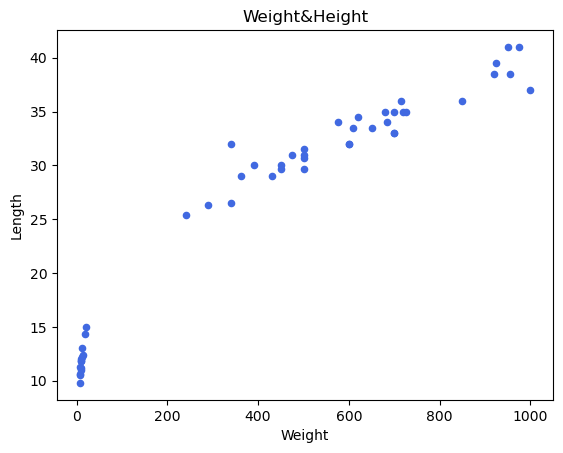

In [132]:
#시각화
#pandas 활용 Series, DF plot()
colormap=['orange','blue']
#feature.plot(kind = 'scatter', x = 'Weight', y = 'Length')
#feature.plot(kind = 'scatter', x = newdata.Length, y = newdata.Weight, c= 'violet' )
feature.plot(kind='scatter', x='Weight', y='Length', color='royalblue',title= 'Weight&Height' , legend = True)

In [133]:
import matplotlib.pyplot as plt

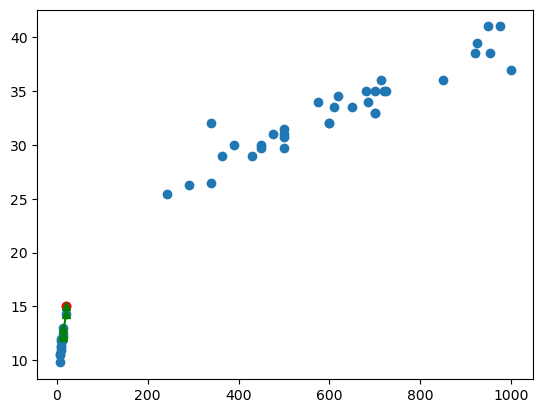

In [134]:
plt.scatter(x=feature.Weight, y=feature.Length)

plt.plot(newdata.Weight[0], newdata.Length[0], 'ro')

plt.plot(kneighDF.Weight, kneighDF.Length, 'g^-')

plt.show()